In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/videogamesales/vgsales.csv


# Overview

In [2]:
# Reading the CSV file
videogames = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv", index_col="Rank")
videogames.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
videogames.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


# Data Cleaning
### Converting all the Sales columns to numeric

In [5]:
videogames.Global_Sales = pd.to_numeric(videogames.Global_Sales, errors="coerce")
videogames.NA_Sales = pd.to_numeric(videogames.NA_Sales, errors="coerce")
videogames.EU_Sales = pd.to_numeric(videogames.EU_Sales, errors="coerce")
videogames.JP_Sales = pd.to_numeric(videogames.JP_Sales, errors="coerce")
videogames.Other_Sales = pd.to_numeric(videogames.Other_Sales, errors="coerce")

## Counting and Indexing Missing Data

In [6]:
# Count cells with missing values
total_missing = videogames.isnull().sum().sum()
print(f'Cells with missing: {total_missing}')

Cells with missing: 329


In [7]:
# Total cells of the DF
shape = np.product(videogames.shape)

In [8]:
# Percent missing
percent_missing = (total_missing/shape)
print(f'Percent missing: {percent_missing:.3}')

Percent missing: 0.00198


In [9]:
# Indexing the missing data
videogames[videogames.Year.isnull()]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01


## Parsing dates

In [10]:
videogames["Date"] = pd.to_datetime(videogames.Year, format="%Y")

In [11]:
# Creating a new column with month
videogames["Month"] = videogames.Date.dt.month
videogames

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Date,Month
Rank,,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006-01-01,1.0
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985-01-01,1.0
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2008-01-01,1.0
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009-01-01,1.0
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1996-01-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,2002-01-01,1.0
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,2003-01-01,1.0
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,2008-01-01,1.0


## What were the best genere in sales by year?

In [12]:
# Creating a new DataFrame of Global Sales gruping by Year and Genre
V_Year_Genre = pd.DataFrame(videogames.groupby(["Year","Genre"]).Global_Sales.sum())

In [13]:
# Sorting values by Global Sales in descending way
V_Year_Genre.sort_values(by=["Year","Global_Sales"], ascending=[True, False])

Global_Sales
Year   Genre                     
1980.0 Shooter               7.07
       Misc                  2.71
       Fighting              0.77
       Sports                0.49
       Action                0.34
...                           ...
2016.0 Strategy              0.50
       Simulation            0.39
2017.0 Role-Playing          0.04
       Action                0.01
2020.0 Simulation            0.29

[389 rows x 1 columns]

## Fixing the ranking gruping by Name
Searching GTA V in the DataFrame, here I realized that the ranking is wrong because the sales are splited by platform

In [14]:
# Indexing GTA V 
videogames[videogames["Name"] == "Grand Theft Auto V"]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Date,Month
Rank,,,,,,,,,,,,
17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,2013-01-01,1.0
24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,2013-01-01,1.0
45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98,2014-01-01,1.0
198,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08,2014-01-01,1.0
1898,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08,2015-01-01,1.0


In [15]:
# So I fix it
# Gruping the Global_Sales by Name
correct_ranking = pd.DataFrame(videogames.groupby('Name')['Global_Sales'].sum())
correct_ranking = correct_ranking.sort_values(by='Global_Sales',ascending=False).reset_index()
correct_ranking.columns = ['Correct_Ranking','Global_Sales']
correct_ranking.head()

,Correct_Ranking,Global_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82


In [16]:
# Indexing the orignal (wrong) Global_Sales Ranking
wrong_ranking = videogames[['Name','Global_Sales']]
wrong_ranking.columns = ['Wrong_Ranking','Global_Sales']
wrong_ranking.head()

,Wrong_Ranking,Global_Sales
Rank,,
1,Wii Sports,82.74
2,Super Mario Bros.,40.24
3,Mario Kart Wii,35.82
4,Wii Sports Resort,33.00
5,Pokemon Red/Pokemon Blue,31.37


### Comparing the old and the new Ranking
We can see that in the new ranking, GTA V is in the second place, insted of the 17th in the wrong ranking

In [17]:
correct_ranking = correct_ranking.reset_index(drop=True)
wrong_ranking = wrong_ranking.reset_index(drop=True)
pd.concat([correct_ranking, wrong_ranking], axis=1)[:20]

,Correct_Ranking,Global_Sales,Wrong_Ranking,Global_Sales
0,Wii Sports,82.74,Wii Sports,82.74
1,Grand Theft Auto V,55.92,Super Mario Bros.,40.24
2,Super Mario Bros.,45.31,Mario Kart Wii,35.82
3,Tetris,35.84,Wii Sports Resort,33.00
4,Mario Kart Wii,35.82,Pokemon Red/Pokemon Blue,31.37
5,Wii Sports Resort,33.00,Tetris,30.26
6,Pokemon Red/Pokemon Blue,31.37,New Super Mario Bros.,30.01
7,Call of Duty: Black Ops,31.03,Wii Play,29.02
8,Call of Duty: Modern Warfare 3,30.83,New Super Mario Bros. Wii,28.62
9,New Super Mario Bros.,30.01,Duck Hunt,28.31


### Number of duplicated Games

In [18]:
platforms = videogames.Platform.unique()
print('Platforms: {}'.format(', '.join(platforms)))

Platforms: Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, 3DS, PS4, N64, PS, XB, PC, 2600, PSP, XOne, GC, WiiU, GEN, DC, PSV, SAT, SCD, WS, NG, TG16, 3DO, GG, PCFX


In [19]:
mean_platforms = videogames.groupby('Name')['Platform'].count().mean()
print(f'Each game is realased in {mean_platforms:.3} platforms on avarage')

Each game is realased in 1.44 platforms on avarage


In [20]:
print(f'Original dataframe rows: {wrong_ranking.shape[0]}')
print(f'New dataframe rows: {correct_ranking.shape[0]}')

duplicated_games = (wrong_ranking.shape[0] - correct_ranking.shape[0])/mean_platforms
print(f'There was at least {duplicated_games:.5} duplicated games that were removed')

Original dataframe rows: 16598
New dataframe rows: 11493
There was at least 3534.9 duplicated games that were removed


# Exploratory Data Analysis
### Question I asked to de data:
1. What is the distribution of the global sales?
2. What are the best-selling genres?
3. What is the tendency of the sales?

## Distribution of the global sales

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Global_Sales', ylabel='Count'>

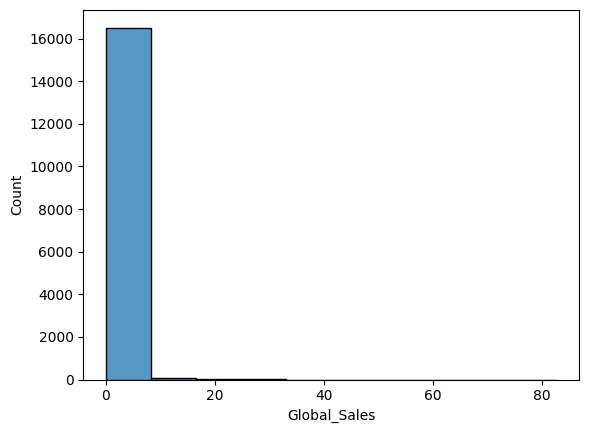

In [21]:
# Distribution of Global Sales
sns.histplot(videogames.Global_Sales, bins=10)

## Best Selling Genres

<Axes: xlabel='Genre', ylabel='Global_Sales'>

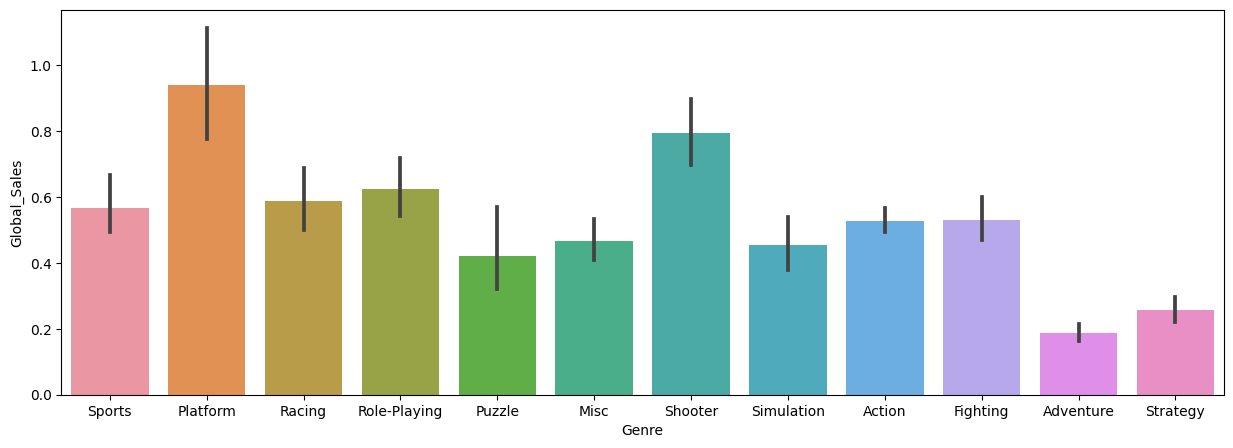

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(x=videogames["Genre"], y=videogames["Global_Sales"])

## Tendency of the Global Sales

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Global_Sales'>

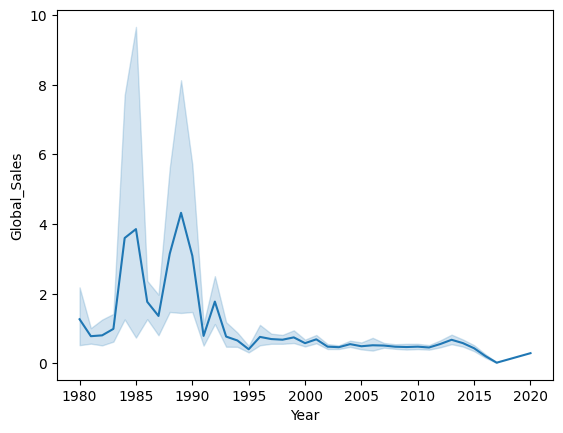

In [23]:
sns.lineplot(x=videogames.Year, y=videogames.Global_Sales)

### Just wanted to experiment

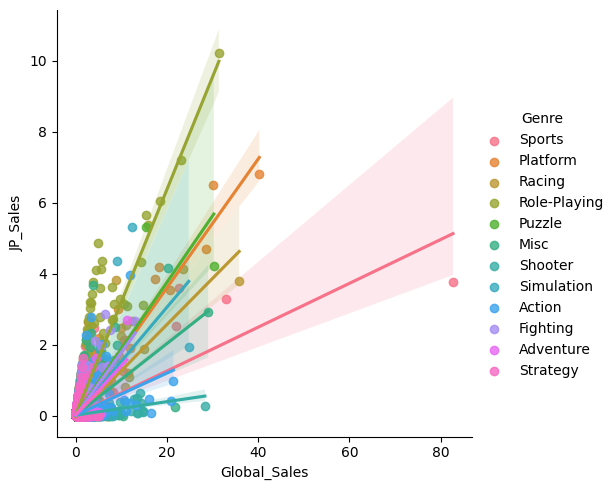

In [24]:
sns.lmplot(data=videogames, x="Global_Sales", y="JP_Sales", hue="Genre")

# Scaling and Normalization

In [25]:
# Scaling Data
videogames["Scalated_GSales"] = minmax_scaling(videogames[["Global_Sales"]], columns=["Global_Sales"])
videogames[["Scalated_GSales"]]

,Scalated_GSales
Rank,
1,1.000000
2,0.486281
3,0.432854
4,0.398767
5,0.379064
...,...
16596,0.000000
16597,0.000000
16598,0.000000


In [26]:
# Normalizing Data
positive_JPSales = videogames.JP_Sales.loc[videogames.JP_Sales > 0]
Normalized_Data = pd.Series(stats.boxcox(positive_JPSales)[0], name="Normalized Data", index=positive_JPSales.index)
Normalized_Data

Rank
1        1.217928
2        1.695931
3        1.222372
4        1.099878
5        2.003263
           ...   
16578   -6.325400
16583   -6.325400
16590   -6.325400
16592   -6.325400
16593   -6.325400
Name: Normalized Data, Length: 6143, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Normalized Data', ylabel='Count'>

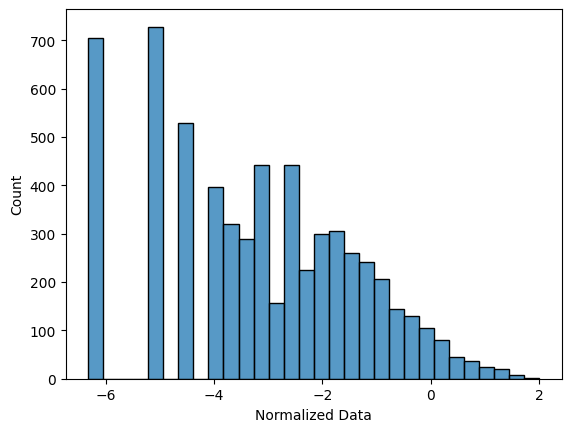

In [27]:
sns.histplot(Normalized_Data)

## Indexing Platform and Puzzle games

In [28]:
videogames[videogames.Genre.isin(["Platform","Puzzle"])]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Date,Month,Scalated_GSales
Rank,,,,,,,,,,,,,
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985-01-01,1.0,0.486281
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1989-01-01,1.0,0.365647
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2006-01-01,1.0,0.362625
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,2009-01-01,1.0,0.345824
19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,1990-01-01,1.0,0.249003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16587,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,2003-01-01,1.0,0.000000
16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,2008-01-01,1.0,0.000000
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,2002-01-01,1.0,0.000000


## Adding a column High Sales
Wich tell us if the game sell well

In [29]:
videogames["High_Sales"] = ["Yes" if i > 10 else "No" for i in videogames["Global_Sales"]]
videogames

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Date,Month,Scalated_GSales,High_Sales
Rank,,,,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006-01-01,1.0,1.000000,Yes
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985-01-01,1.0,0.486281,Yes
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2008-01-01,1.0,0.432854,Yes
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009-01-01,1.0,0.398767,Yes
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1996-01-01,1.0,0.379064,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,2002-01-01,1.0,0.000000,No
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,2003-01-01,1.0,0.000000,No
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,2008-01-01,1.0,0.000000,No


# Saving the dataframe to CSV

In [30]:
videogames.to_csv("videogamesales2.csv", index=False)

In [31]:
videogames2 = pd.read_csv("videogamesales2.csv")
videogames2.index.name = "Rank"
videogames2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Date,Month,Scalated_GSales,High_Sales
Rank,,,,,,,,,,,,,,
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006-01-01,1.0,1.000000,Yes
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985-01-01,1.0,0.486281,Yes
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2008-01-01,1.0,0.432854,Yes
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009-01-01,1.0,0.398767,Yes
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1996-01-01,1.0,0.379064,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,2002-01-01,1.0,0.000000,No
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,2003-01-01,1.0,0.000000,No
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,2008-01-01,1.0,0.000000,No
